_version log: trying to correct for the background_

In [113]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from PIL import Image

pixel_pitch = 9.9 #um

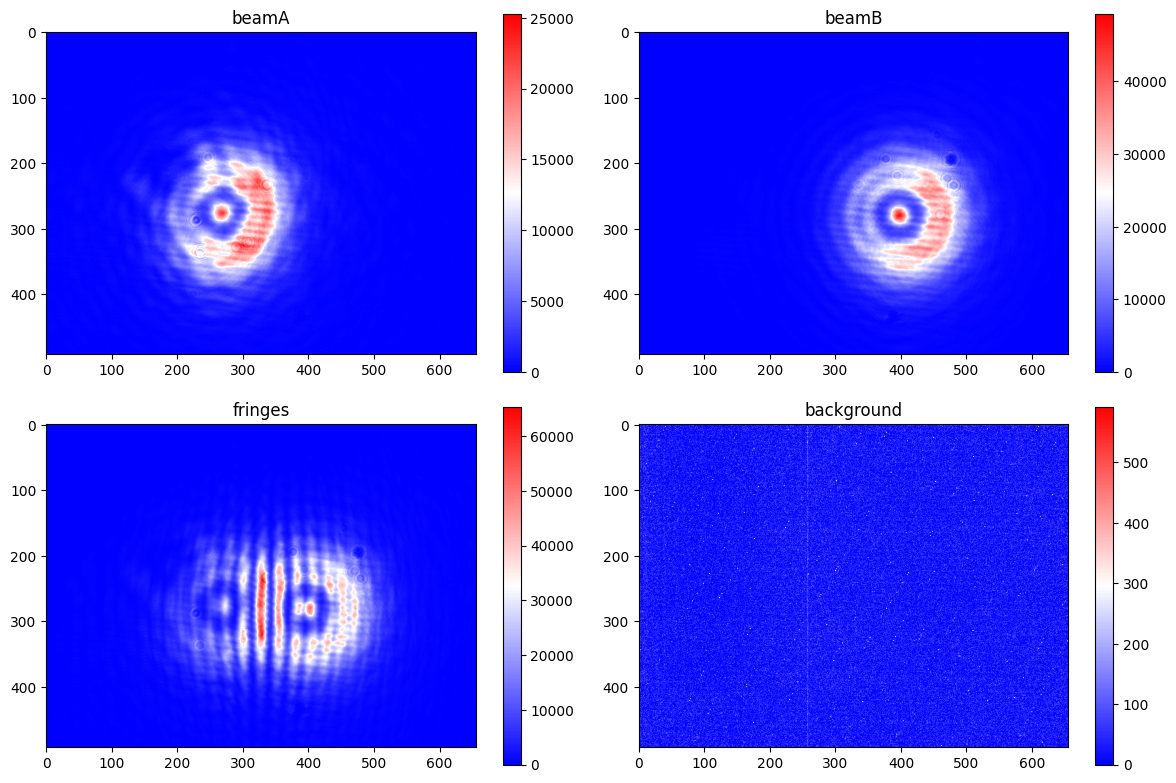

In [114]:
im = Image.open('data\\green_BA3.tif')
beamA = np.array(im, dtype= np.float32)
im = Image.open('data\\green_BB3.tif')
beamB = np.array(im, dtype= np.float32)
im = Image.open('data\\green_fringes3.tif')
fringes = np.array(im, dtype= np.float32)
im = Image.open('data\\green_bg3.tif')
background = np.array(im, dtype= np.float32)

plt.figure(figsize= (12,8))

plt.subplot(2,2,1)
im=plt.imshow(beamA, cmap='bwr')
plt.colorbar(im)
plt.title("beamA")

plt.subplot(2,2,2)
im=plt.imshow(beamB, cmap='bwr')
plt.colorbar(im)
plt.title("beamB")

plt.subplot(2,2,3)
im=plt.imshow(fringes, cmap='bwr')
plt.colorbar(im)
plt.title("fringes")

plt.subplot(2,2,4)
im=plt.imshow(background, cmap='bwr')
plt.colorbar(im)
plt.title("background")

plt.tight_layout()
plt.show()

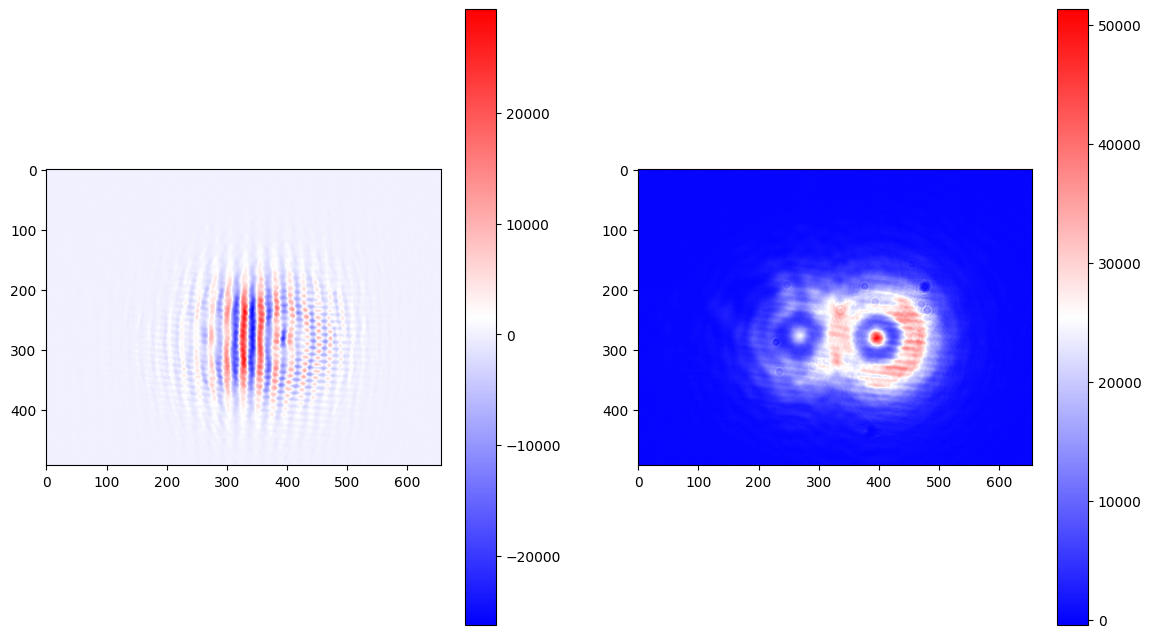

In [149]:
nofringes = beamA +beamB -background

beamPost = fringes - nofringes #take away background. This meathod exaggerates the bandwidth.
#beamPost = fringes / nofringes #normalise using background. This meathod suffers with div0 errors

plt.figure(figsize = (14,8))

plt.subplot(1,2,1)
im=plt.imshow(beamPost, cmap='bwr')
plt.colorbar(im)

plt.subplot(1,2,2)
im=plt.imshow(nofringes, cmap='bwr')
plt.colorbar(im)

plt.show()

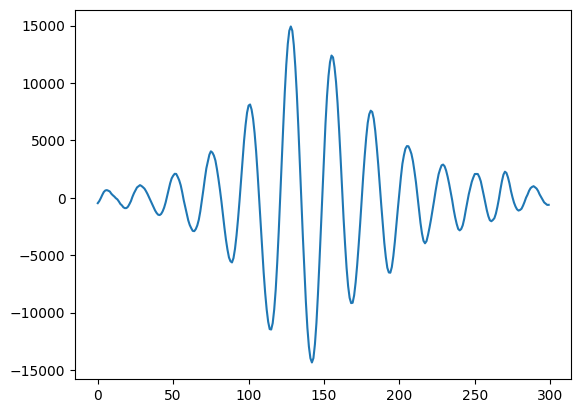

In [156]:
ROI = [[150,400],[200,500]] #rows, columns

average_signal = np.mean(beamPost[ROI[0][0]:ROI[0][1], ROI[1][0]:ROI[1][1]], axis = 0)

plt.plot(average_signal)
plt.show()


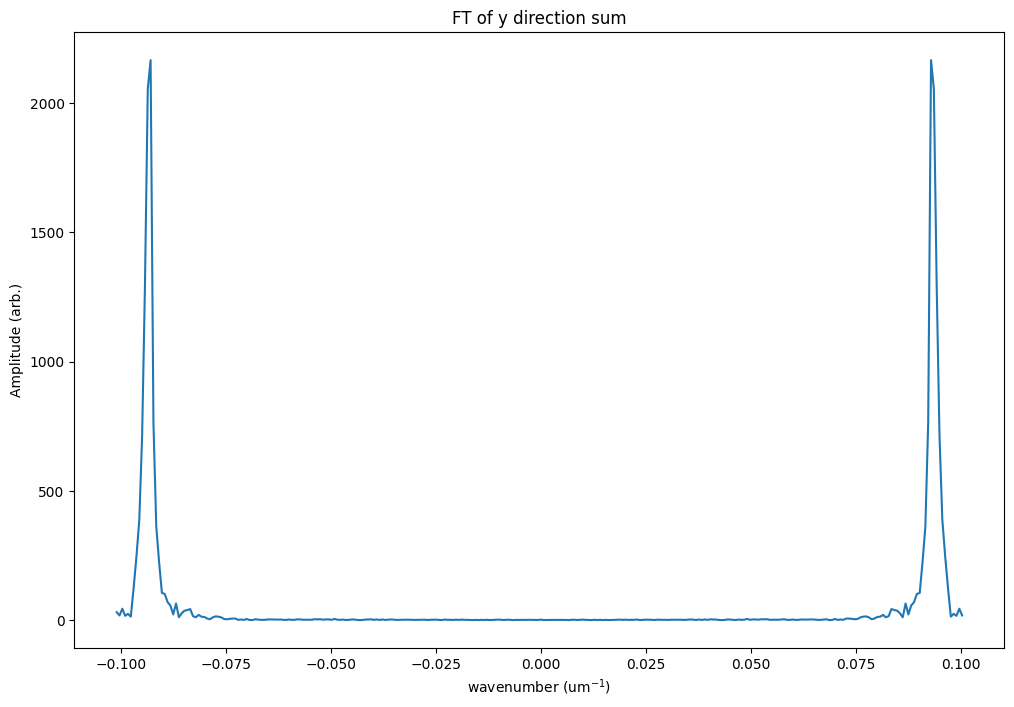

In [157]:
FT = np.fft.fft(average_signal, norm = "forward")

num_of_freqs = len(FT)//2 +1
samples = len(FT)
freqs = np.linspace(-1/pixel_pitch, 0, num_of_freqs)
freqs = np.concatenate((freqs, -freqs[-2::-1]))
freqs = freqs[:len(FT)]

plt.figure(figsize = (12,8))
plt.subplot(1, 1, 1)

plt.plot(freqs,
        abs(FT))

plt.xlabel('wavenumber (um$^{-1}$)')
plt.ylabel('Amplitude (arb.)')
plt.title("FT of y direction sum")

plt.show()

C:\Users\syf83691\AppData\Local\Temp\ipykernel_10480\4090602943.py:17: RuntimeWarning: divide by zero encountered in divide
  wavelengths = -1/freqs[:-num_of_freqs +2]


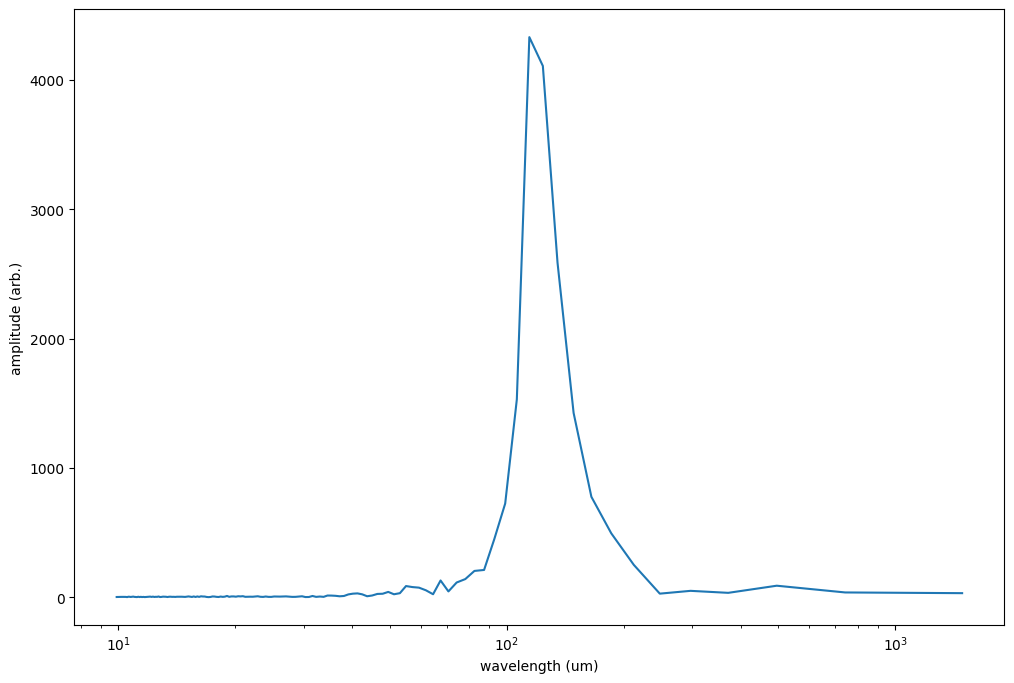

In [158]:
# find amplitudes from fourier

#FT = np.fft.fftshift(FT) #rearranges the array such that 0,0 at the beginning

amplitude = np.zeros(num_of_freqs)
amplitude[0] = np.abs(FT[0])

if (samples//2 == samples/2): #if even
        amplitude[num_of_freqs-1] = np.abs(FT[num_of_freqs-1])
        amplitude[1:-1] = (np.abs( FT[1:num_of_freqs-1] ) +
                        np.abs( FT[:num_of_freqs-1:-1] ))
else:
        amplitude[1:] = (np.abs( FT[1:num_of_freqs] ) +
                        np.abs( FT[:num_of_freqs-1:-1] ))

#convert (spatical) freqencies into wavelengths
wavelengths = -1/freqs[:-num_of_freqs +2]

plt.figure(figsize = (12,8))
plt.subplot(1, 1, 1)

plt.plot(wavelengths[:-1],
        amplitude[-2::-1]) #the largest wavelength is the smallest frequency so the order needs to be reversed
plt.xlabel('wavelength (um)')
plt.ylabel('amplitude (arb.)')
plt.xscale("log")

plt.show()